In [2]:
import pandas as pd
pm_data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\241-152\\finalproject\\data\\new_cleaned_data.csv")
print(pm_data)


             DATETIMEDATA  PM25    O3  WS  TEMP  RH   WD stationID
0     2024-01-01 00:00:00  16.5  16.0   1    27  79  115       44t
1     2024-01-01 01:00:00  33.6   0.0   1    27  82   97       44t
2     2024-01-01 02:00:00  34.2   0.0   1    26  84   96       44t
3     2024-01-01 03:00:00  20.1   0.0   1    26  82  108       44t
4     2024-01-01 04:00:00  16.5   1.0   1    27  79  106       44t
...                   ...   ...   ...  ..   ...  ..  ...       ...
1387  2024-02-27 19:00:00  21.7   9.0   1    29  67  162       44t
1388  2024-02-27 20:00:00  17.5   1.0   1    29  68  134       44t
1389  2024-02-27 21:00:00  21.1   0.0   1    29  69  140       44t
1390  2024-02-27 22:00:00  23.2   0.0   1    29  70  111       44t
1391  2024-02-27 23:00:00  16.2   8.0   1    28  71  120       44t

[1392 rows x 8 columns]


In [1]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
pm_data = pd.read_csv("C:\\Users\\ASUS\\Desktop\\241-152\\finalproject\\data\\new_cleaned_data.csv")
pm_data = pm_data.drop(["stationID"],axis=1)
pm_data["DATETIMEDATA"] = pd.to_datetime(pm_data["DATETIMEDATA"])
print(pm_data)


            DATETIMEDATA  PM25    O3  WS  TEMP  RH   WD
0    2024-01-01 00:00:00  16.5  16.0   1    27  79  115
1    2024-01-01 01:00:00  33.6   0.0   1    27  82   97
2    2024-01-01 02:00:00  34.2   0.0   1    26  84   96
3    2024-01-01 03:00:00  20.1   0.0   1    26  82  108
4    2024-01-01 04:00:00  16.5   1.0   1    27  79  106
...                  ...   ...   ...  ..   ...  ..  ...
1387 2024-02-27 19:00:00  21.7   9.0   1    29  67  162
1388 2024-02-27 20:00:00  17.5   1.0   1    29  68  134
1389 2024-02-27 21:00:00  21.1   0.0   1    29  69  140
1390 2024-02-27 22:00:00  23.2   0.0   1    29  70  111
1391 2024-02-27 23:00:00  16.2   8.0   1    28  71  120

[1392 rows x 7 columns]


In [3]:
from pycaret.regression import *
s = setup(pm_data, target = 'PM25', session_id = 123,date_features=["DATETIMEDATA"],normalize=True)

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(1392, 7)"
4,Transformed data shape,"(1392, 9)"
5,Transformed train set shape,"(974, 9)"
6,Transformed test set shape,"(418, 9)"
7,Numeric features,5
8,Date features,1
9,Preprocess,True


In [4]:
model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.1486,17.2901,4.1499,0.3686,0.2208,0.1913,0.0280
rf,Random Forest Regressor,3.1931,17.3219,4.1534,0.3671,0.2224,0.1950,0.0460
gbr,Gradient Boosting Regressor,3.3689,18.4490,4.2826,0.3306,0.2311,0.2076,0.0160
lightgbm,Light Gradient Boosting Machine,3.3653,19.4064,4.4000,0.2852,0.2357,0.2051,0.0850
knn,K Neighbors Regressor,3.5013,20.4983,4.5229,0.2447,0.2416,0.2128,0.0090
ada,AdaBoost Regressor,3.8146,22.8299,4.7604,0.1730,0.2617,0.2479,0.0100
ridge,Ridge Regression,3.8824,24.0729,4.8883,0.1322,0.2660,0.2438,0.0060
lr,Linear Regression,3.8822,24.0734,4.8883,0.1321,0.2660,0.2438,0.2640
br,Bayesian Ridge,3.8924,24.0979,4.8901,0.1319,0.2663,0.2449,0.0070
huber,Huber Regressor,3.8618,24.2559,4.9065,0.1262,0.2646,0.2381,0.0080


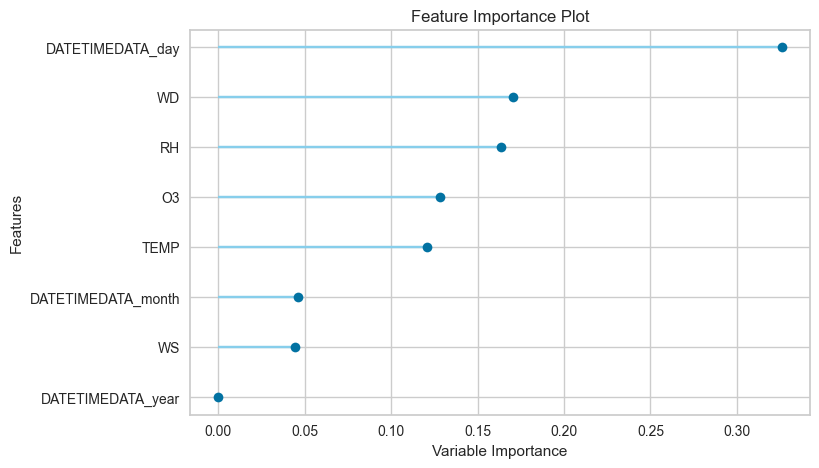

In [5]:
plot_model(model, plot="feature")

In [6]:
model001 = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2699,20.8359,4.5646,0.3076,0.2301,0.1954
1,3.0714,15.8531,3.9816,0.4502,0.2171,0.1920
2,2.9580,14.1712,3.7645,0.2721,0.2138,0.1915
3,3.2401,17.9208,4.2333,0.4051,0.2223,0.1900
4,3.1168,16.2537,4.0316,0.4271,0.2192,0.1895
5,3.4548,18.5508,4.3071,0.4715,0.2259,0.2042
6,2.8980,15.5617,3.9448,0.3007,0.2106,0.1630
7,3.0294,16.7700,4.0951,0.4697,0.2069,0.1814
8,2.9298,15.7567,3.9695,0.2389,0.2074,0.1727


In [7]:
tuned_model001 = tune_model(model001)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6519,22.8464,4.7798,0.2407,0.2528,0.2262
1,3.5424,19.0110,4.3602,0.3407,0.2485,0.2324
2,3.2465,15.7102,3.9636,0.1930,0.2303,0.2133
3,3.4841,19.6239,4.4299,0.3486,0.2338,0.2107
4,3.2667,17.0475,4.1289,0.3992,0.2261,0.2036
5,3.9690,23.8394,4.8826,0.3208,0.2672,0.2477
6,3.3060,16.4851,4.0602,0.2592,0.2123,0.1895
7,3.4595,21.0218,4.5850,0.3352,0.2362,0.2126
8,3.0685,16.7152,4.0884,0.1926,0.2130,0.1800


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
ensemble_model001 = ensemble_model(tuned_model001, method="Bagging")

In [ ]:
ensemble_model002 = ensemble_model(tuned_model001, method="Bagging", n_estimators=75)

In [ ]:
ensemble_model003 = ensemble_model(tuned_model001, method="Bagging", n_estimators=150)

In [ ]:
ensemble_model004 = ensemble_model(tuned_model001, method="Bagging", n_estimators=200)

In [ ]:
best_model = compare_models(include=[ensemble_model001,ensemble_model002,ensemble_model003,ensemble_model004])

In [ ]:
lastest_date = pm_data['DATETIMEDATA'].max()


start_date = lastest_date + pd.DateOffset(hours=1) #วันเริ่มต้น เพิ่ม1ชม จากแถวสุดท้ายของคอลัมdate time data จากcsvเก่า
end_date = start_date + pd.DateOffset(days=25, hours=23) #วันจบ ทำนาย25วัน 
next_week = pd.date_range(start=start_date, end=end_date, freq='D') #สร้างdataflameใหม่ ที่กำหนดความถี่ได้ตรงfreq


next_week_data = pd.DataFrame({'DATETIMEDATA': next_week}) #สร้างdataflameจะใส่ข้อมูลของตัวแปร next_week


#กำหนดให้ตัวแปรเริ่มต้น0 
next_week_data['O3'] = 0
next_week_data['WS'] = 0
next_week_data['TEMP'] = 0
next_week_data['RH'] = 0
next_week_data['WD'] = 0


model_predictions = predict_model(best_model, data=next_week_data)
predict_oneweek_data = pd.DataFrame(model_predictions, columns=['DATETIMEDATA', 'prediction_label'])
print(predict_oneweek_data)